In [1]:
import pandas as pd
import numpy as np
from scipy.io import mmread, mmwrite
import scipy.sparse as sparse

In [2]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
sciCAR_anno = pd.read_table('/gpfs/gibbs/pi/zhao/yw599/Multiome/data/sci-CAR/GSM3271044_RNA_mouse_kidney_cell.txt.gz',
                           sep = ',')

In [207]:
sciCAR_anno.cell_name.value_counts()

Proximal tubule S1/S2 cells             2358
Proximal tubule S3 cells (type 1)       2136
Loop of Henle cells                     1282
Proximal tubule S3 cells (type 2)       1009
Endothelial cells                        972
Distal convoluted tubule cells           764
Renal pericytes                          344
Medullary collecting duct cells          230
Stem cells (Kit+)                        191
Podocyte                                 104
Paranephric body adipocyte                86
Active proliferating cells (Ki-67+)       74
Name: cell_name, dtype: int64

In [5]:
folder = '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/MouseKidney' 

In [18]:
# atac_count = mmread('%s/ATAC/GSE157079_snATAC_cell_by_peak_matrix.txt.gz' % folder)

In [19]:
# type(atac_count)

scipy.sparse.coo.coo_matrix

In [20]:
# atac_count.shape

(28316, 300755)

In [27]:
# atac_count = atac_count.tocsr()

In [28]:
# type(atac_count)

scipy.sparse.csr.csr_matrix

In [31]:
# sparse.isspmatrix(atac_count)

True

In [39]:
# atac_count.max()

1

In [42]:
# mmwrite('%s/ATAC/counts.mtx' % folder, atac_count)

In [40]:
# atac_peak = pd.read_csv('%s/ATAC/GSE157079_snATAC_peak_list.csv.gz' % folder)

In [41]:
# atac_peak

Unnamed: 0        seqnames    start      end  width strand  \
0                1            chr1  3115016  3115356    341      *   
1                2            chr1  3119710  3120787   1078      *   
2                3            chr1  3121548  3121773    226      *   
3                4            chr1  3126118  3126601    484      *   
4                5            chr1  3285439  3285639    201      *   
...            ...             ...      ...      ...    ...    ...   
300750      300751  chrUn_GL456378      308      537    230      *   
300751      300752  chrUn_GL456378    27501    28303    803      *   
300752      300753  chrUn_GL456389    10540    10942    403      *   
300753      300754  chrUn_GL456392    22082    22618    537      *   
300754      300755  chrUn_GL456393    44888    45088    201      *   

                              name  
0             chr1:3115016-3115356  
1             chr1:3119710-3120787  
2             chr1:3121548-3121773  
3             chr1:3126118-3126601  
4             chr1:3285439-3285639  
...                            ...  
300750      chrUn_GL456378:308-537  
300751  chrUn_GL456378:27501-28303  
300752  chrUn_GL456389:10540-10942  
300753  chrUn_GL456392:22082-22618  
300754  chrUn_GL456393:44888-45088  

[300755 rows x 7 columns]

In [168]:
# atac_peak.seqnames.value_counts()

chr2                    23395
chr1                    21327
chr11                   18890
chr4                    18846
chr5                    18580
chr6                    17303
chr7                    16767
chr9                    16576
chr3                    16264
chr8                    15849
chr10                   15712
chr13                   14367
chr12                   12966
chr14                   12765
chr15                   12627
chr17                   11943
chr16                   11175
chr18                   10588
chr19                    8677
chrX                     6051
chrUn_JH584304             33
chrY                       25
chrX_GL456233_random        9
chr4_GL456216_random        5
chrM                        3
chrUn_GL456359              2
chr4_JH584295_random        2
chrUn_GL456366              2
chrUn_GL456378              2
chrUn_GL456239              1
chrUn_GL456389              1
chrUn_GL456392              1
chrUn_GL456393              1
Name: seqn

In [6]:
# Read annotations
atac_anno = pd.read_table('%s/ATAC/GSE157079_snATAC_metadata.csv.gz' % folder,
                         sep = ',', index_col=0)
rna_anno = pd.read_table('%s/RNA/GSE157079_P0_adult_clusters.txt.gz' % folder,
                         sep = '\t', index_col=0)

In [11]:
atac_anno.clusters.value_counts()

PT         7412
LOH        3628
stroma2    3539
Endo       2368
NP         2232
PT2        1943
stroma1    1479
PC         1325
DCT         950
Podo        912
CNT         879
IC          599
PT_out      446
immune      386
NP_LOH      218
Name: clusters, dtype: int64

In [12]:
rna_anno.clusters.value_counts()

PST              9563
DCT              9075
Stroma 2         4492
PCT              3687
PC               3248
Endo             2395
Proliferating    2177
Early PT         1816
LOH              1748
Macro            1242
Podo              982
IC                953
Stroma 1          774
NP                633
Neutro            625
Unnamed           226
Name: clusters, dtype: int64

In [9]:
len(atac_anno.clusters.value_counts())

15

In [10]:
len(rna_anno.clusters.value_counts())

16

In [94]:
atac_anno.clusters.value_counts().index.difference(rna_anno.clusters.value_counts().index)

Index(['CNT', 'NP_LOH', 'PT', 'PT2', 'PT_out', 'immune', 'stroma1', 'stroma2'], dtype='object')

In [95]:
rna_anno.clusters.value_counts().index.difference(atac_anno.clusters.value_counts().index)

Index(['Early PT', 'Macro', 'Neutro', 'PCT', 'PST', 'Proliferating',
       'Stroma 1', 'Stroma 2', 'Unnamed'],
      dtype='object')

In [96]:
atac_anno.clusters.value_counts().index.intersection(rna_anno.clusters.value_counts().index)

Index(['LOH', 'Endo', 'NP', 'PC', 'DCT', 'Podo', 'IC'], dtype='object')

In [145]:
atac_umap = pd.read_csv('%s/ATAC/GSE157079_snATAC_UMAP_coordinates.csv.gz' % folder, index_col=0)

In [146]:
rna_umap = pd.read_table('%s/RNA/GSE157079_P0_adult_umap.txt.gz' % folder, sep='\t', index_col=0)

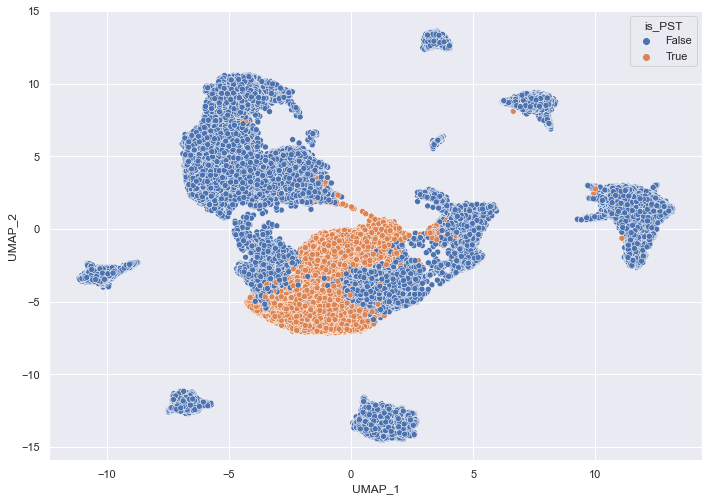

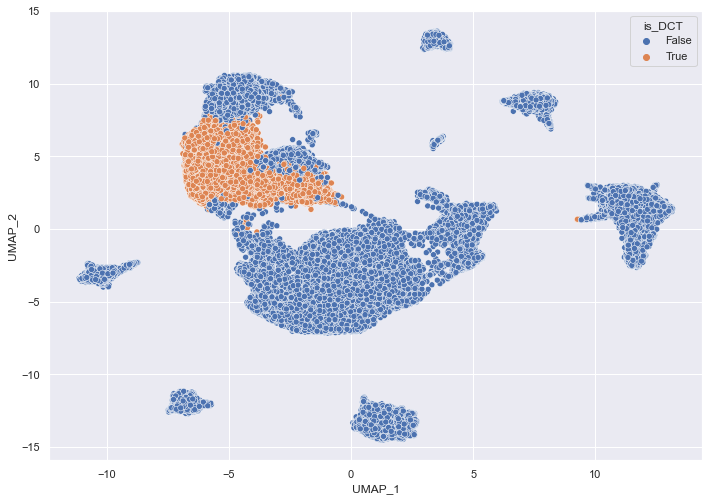

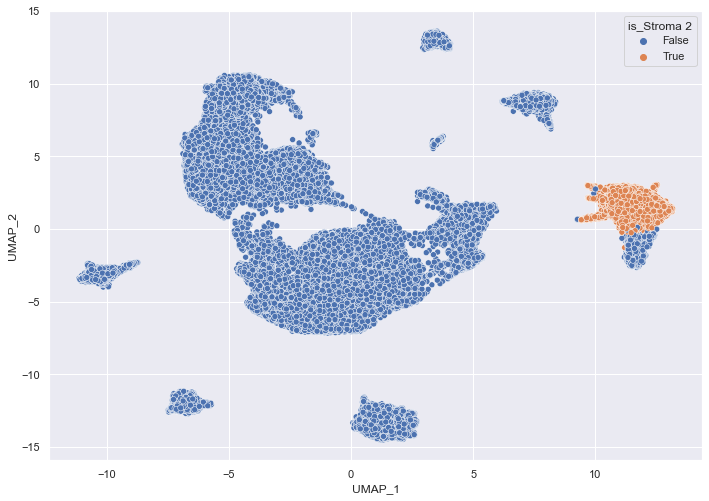

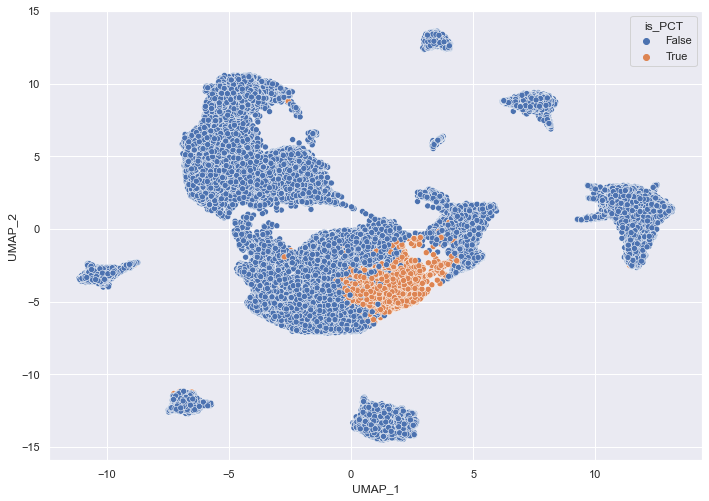

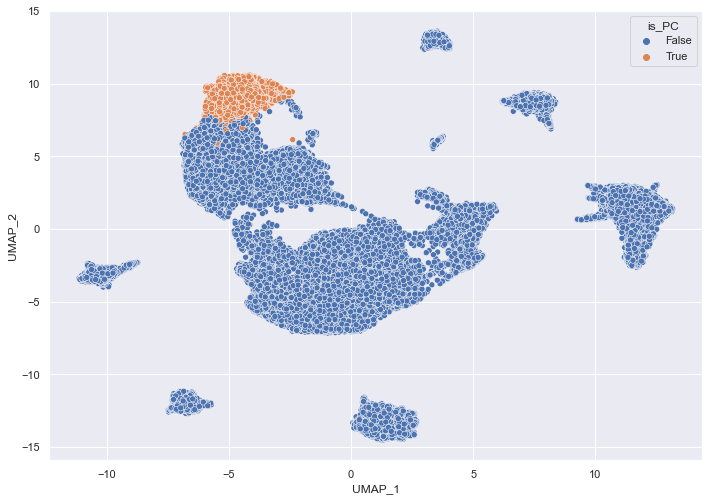

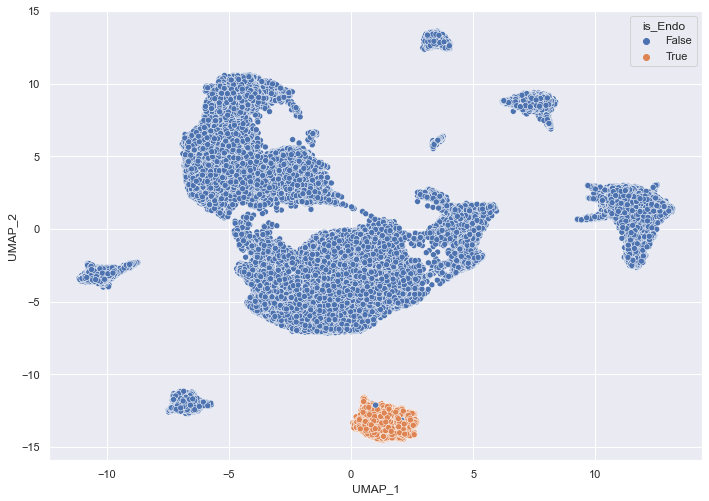

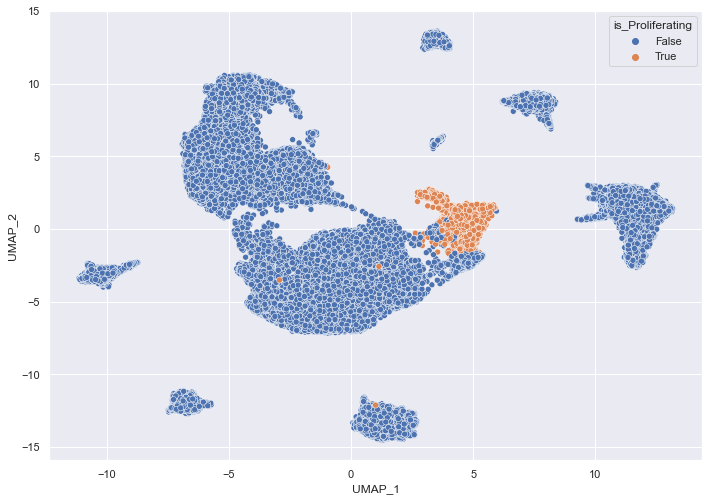

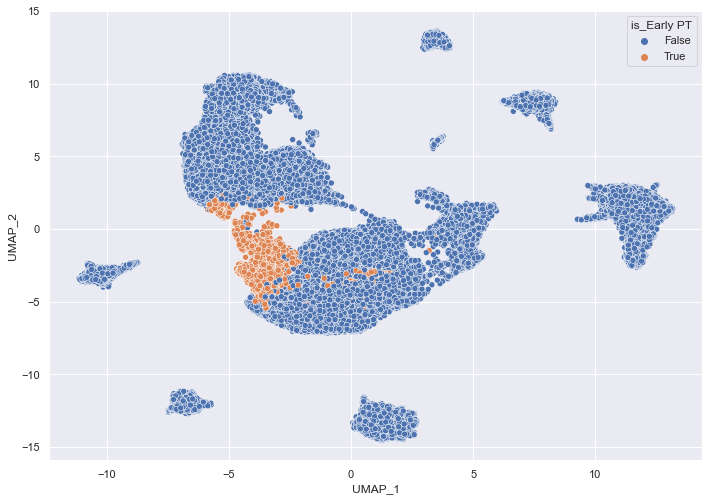

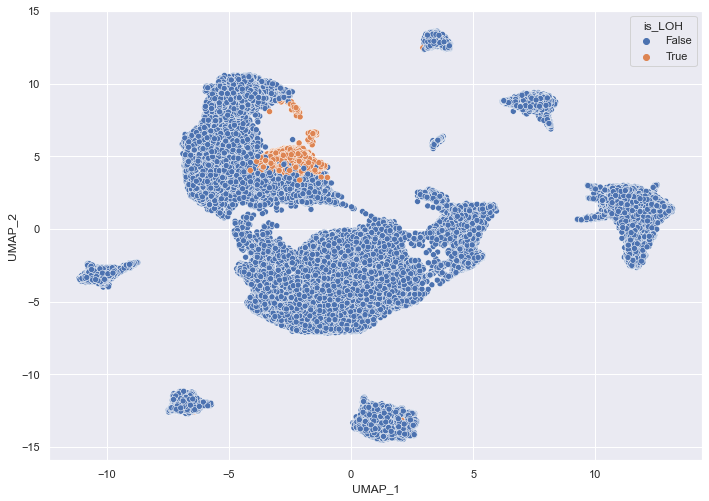

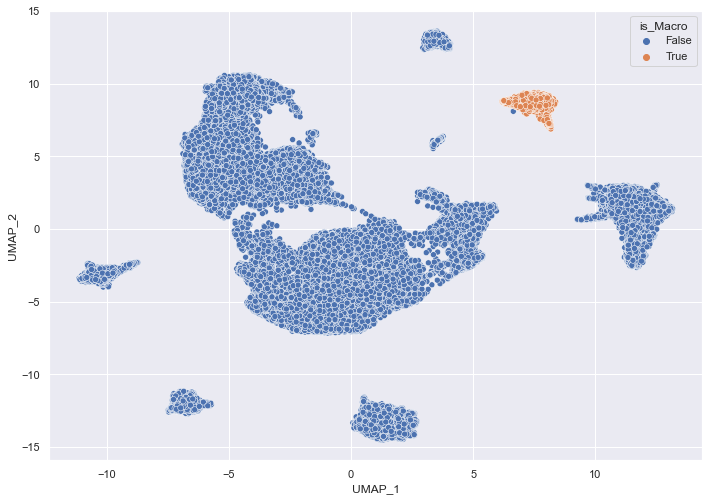

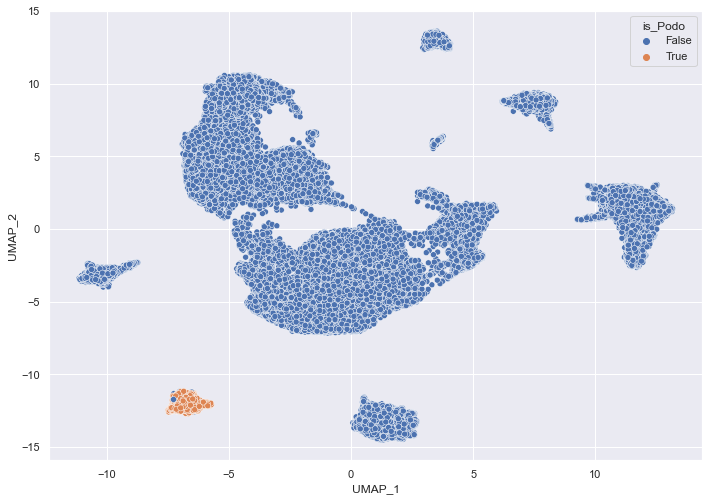

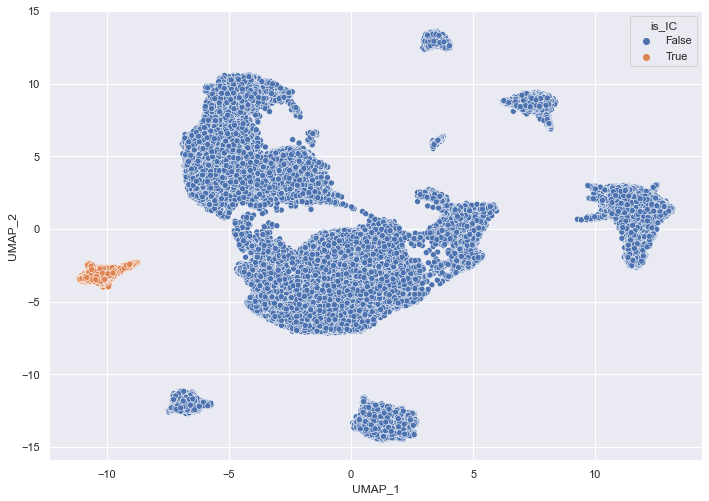

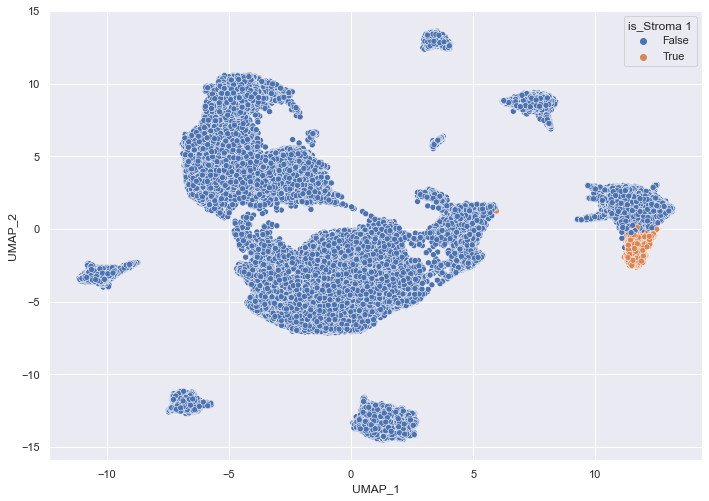

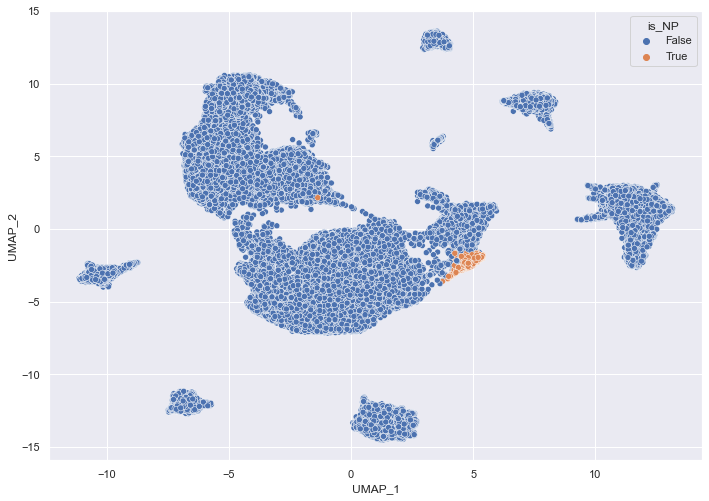

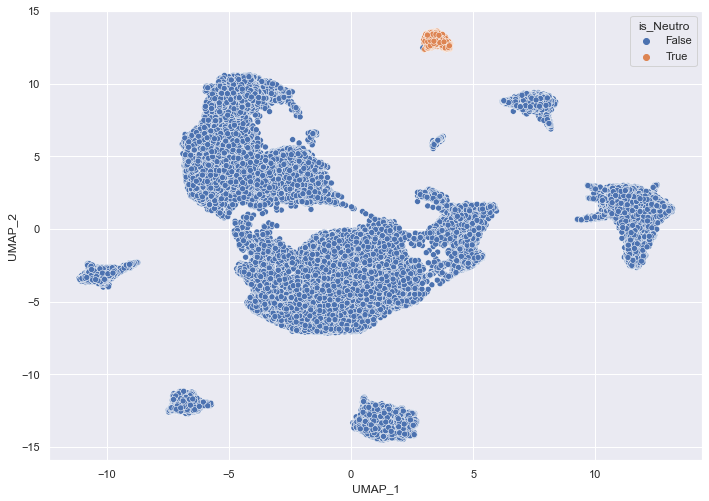

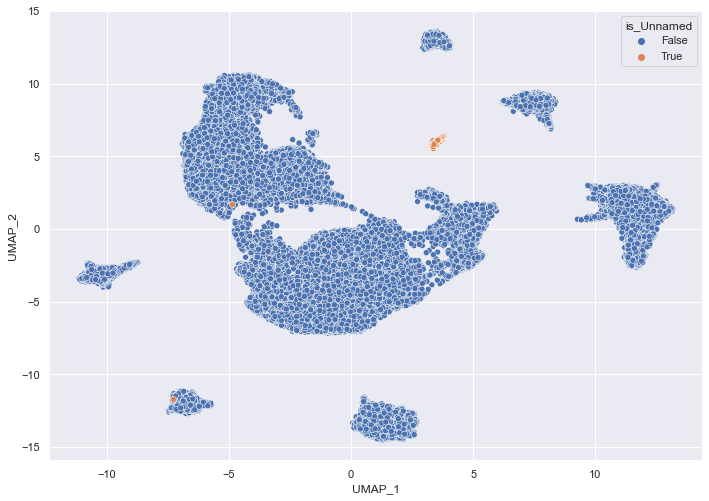

In [119]:
rna_meta = pd.concat([rna_anno.set_index('barcodes'), rna_umap], axis=1)
for c in rna_meta.clusters.value_counts().index:
    fig, ax = plt.subplots()
    rna_meta['is_%s' % c] = rna_meta.clusters == c
    sns.scatterplot(x='UMAP_1', y='UMAP_2', data=rna_meta, hue='is_%s' % c, ax=ax)

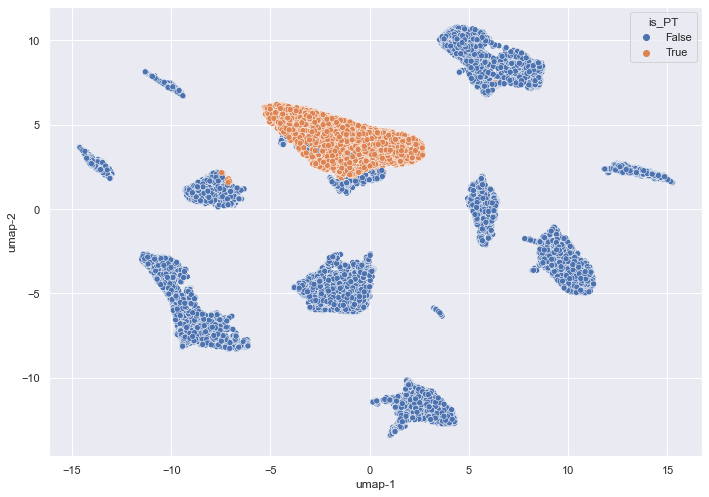

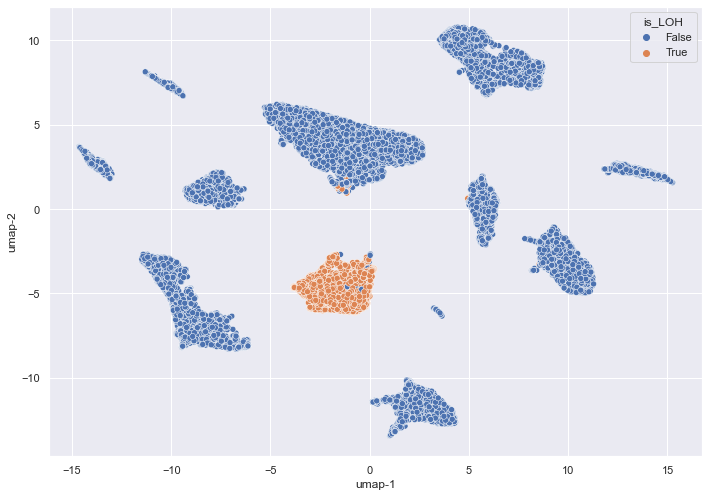

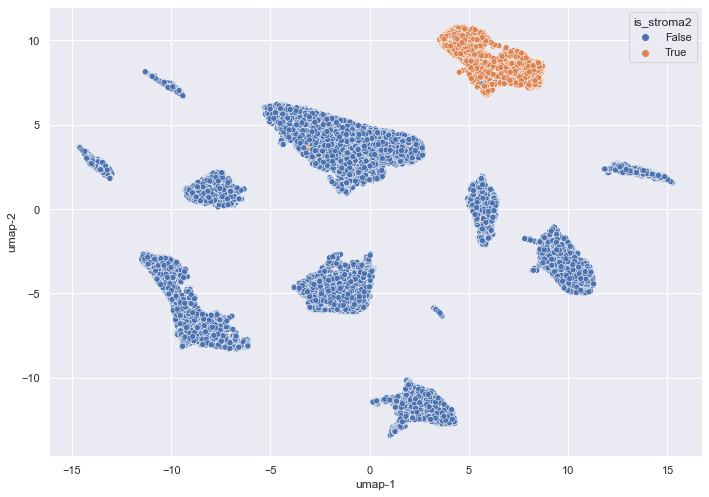

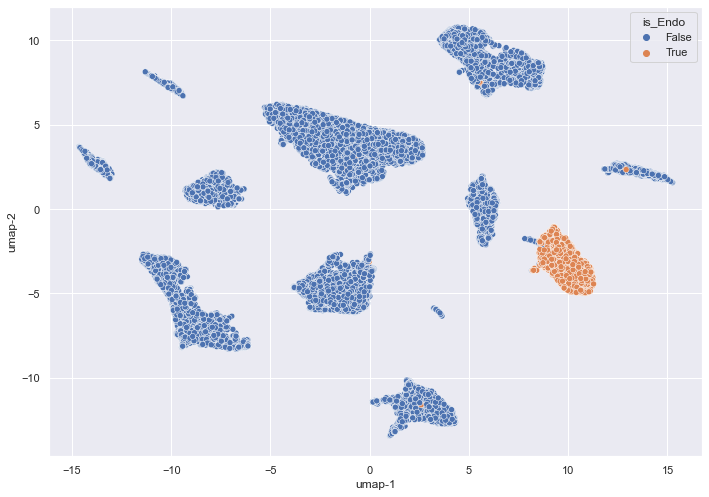

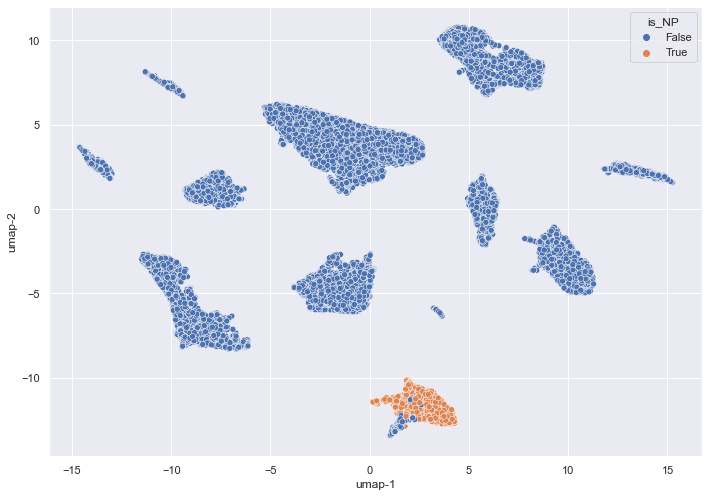

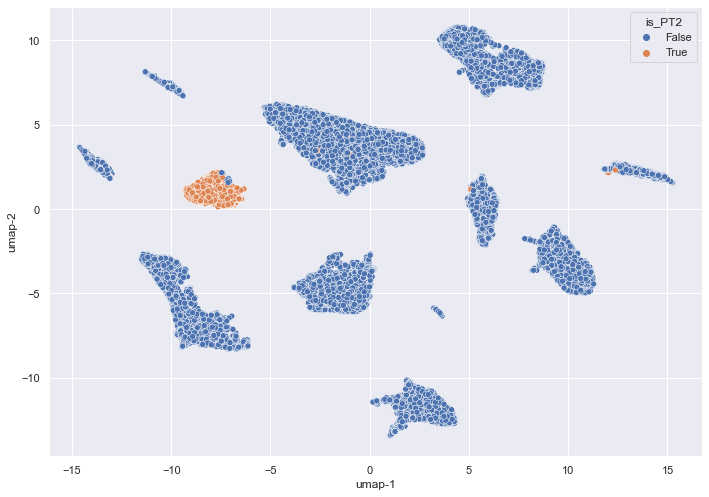

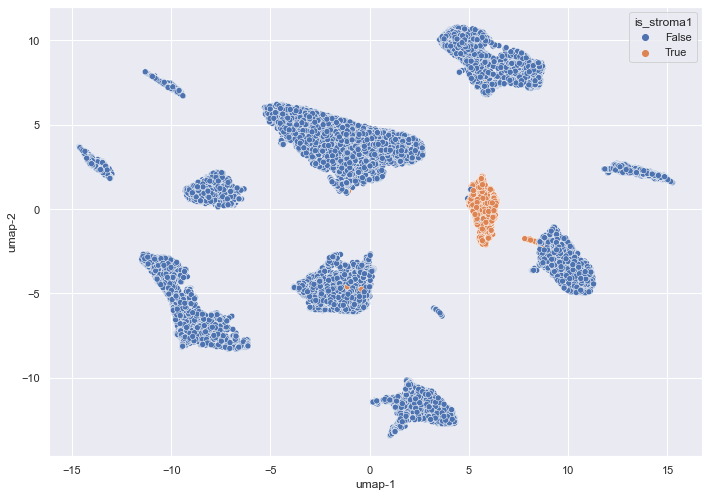

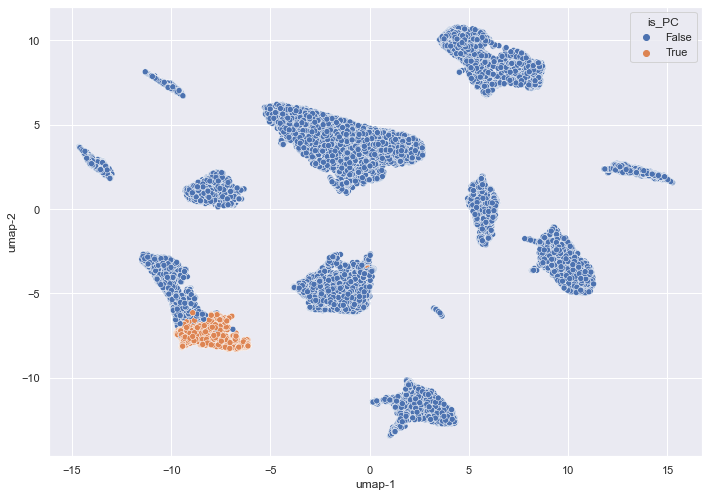

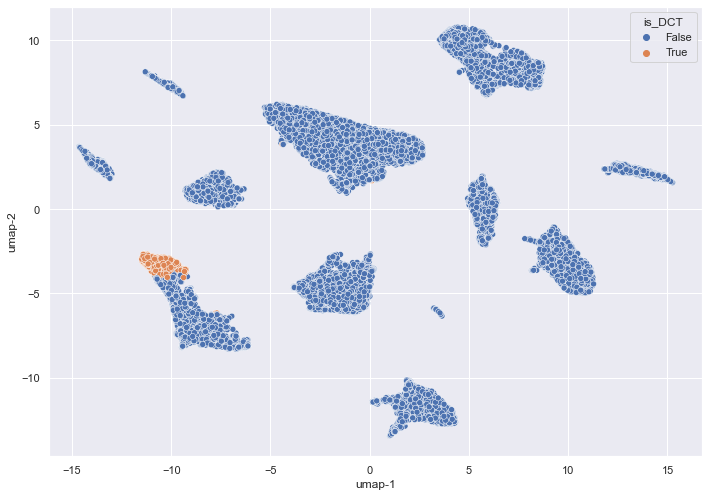

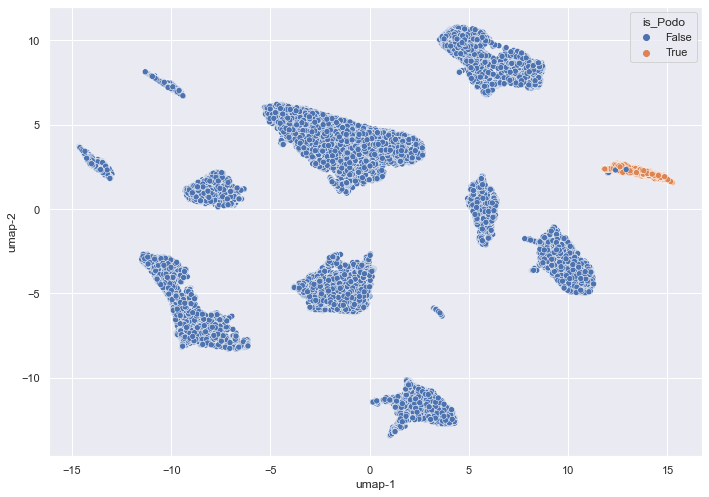

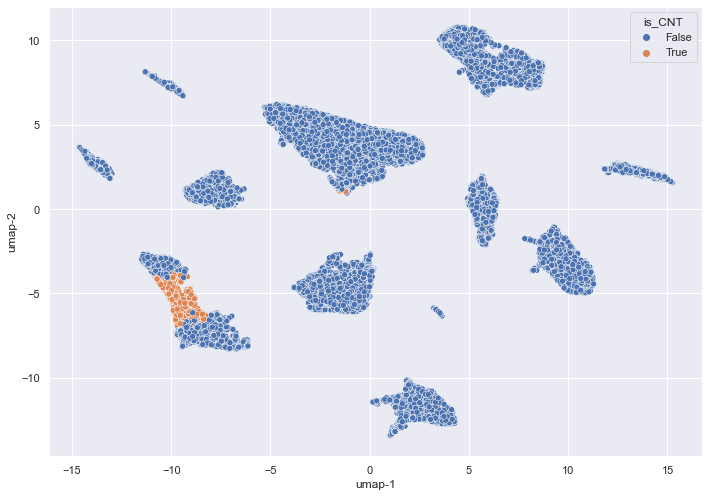

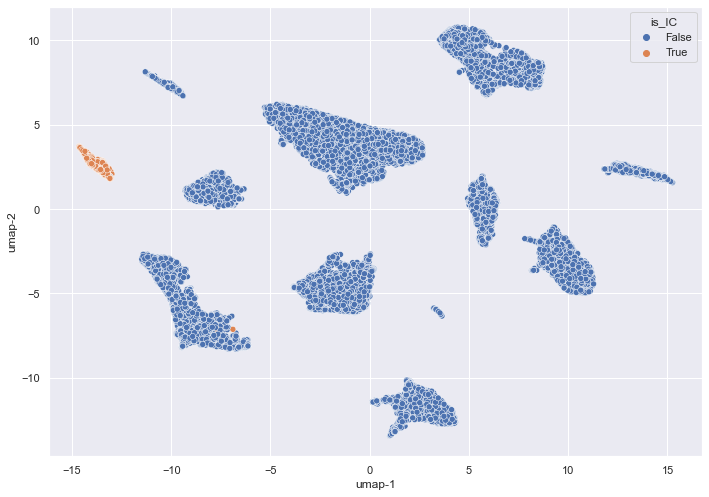

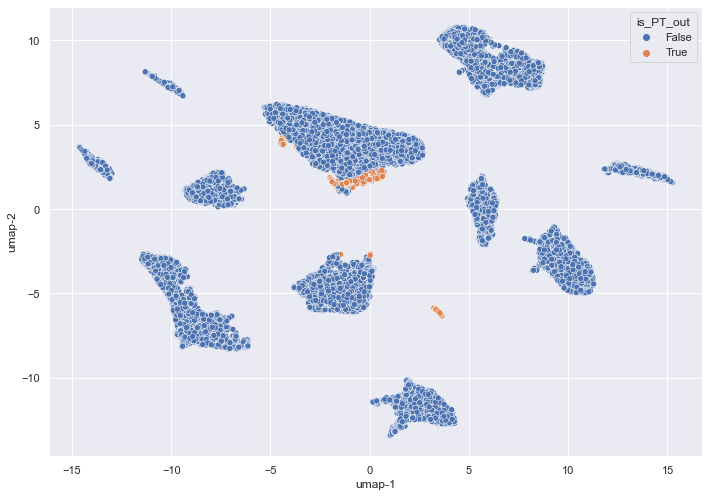

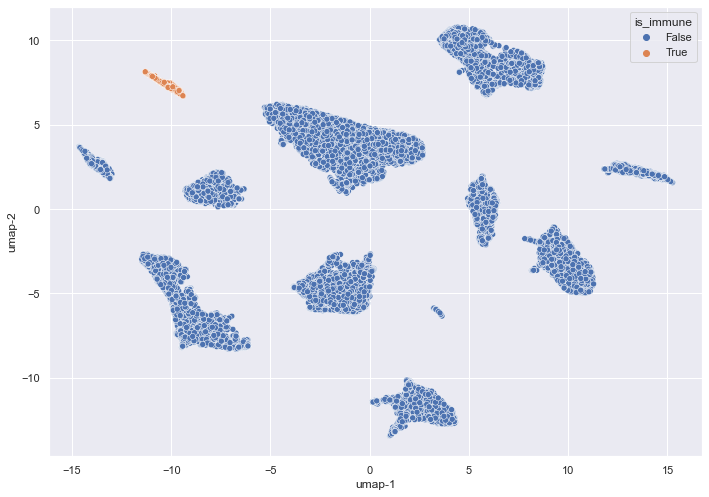

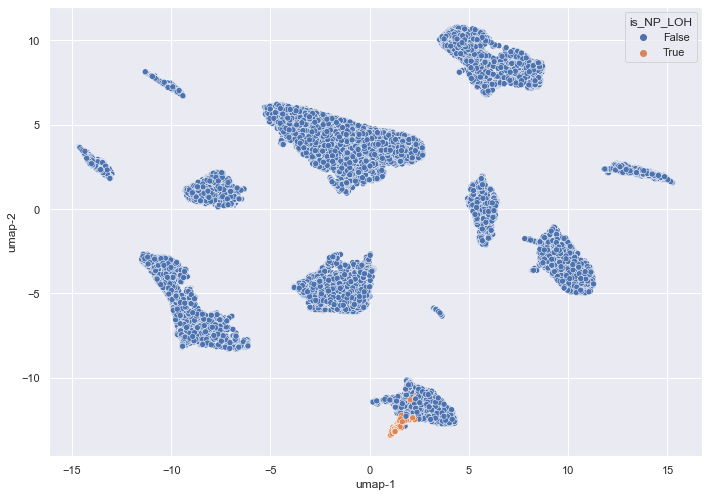

In [91]:
atac_meta = pd.concat([atac_anno, atac_umap], axis=1)
for c in atac_meta.clusters.value_counts().index:
    fig, ax = plt.subplots()
    atac_meta['is_%s' % c] = atac_meta.clusters == c
    sns.scatterplot(x='umap-1', y='umap-2', data=atac_meta, hue='is_%s' % c, ax=ax)

In [14]:
# Rename cells in ATAC
rename_atac = {'PT': 'PCT', 'PT2': 'PST', 'stroma2': 'Stroma 2', 'stroma1': 'Stroma 1', 'immune': 'Immune'}
atac_anno['annotation'] = atac_anno.clusters.replace(rename_atac)

In [15]:
# Rename cells in RNA
rename_rna = {'Neutro': 'Immune', 'Macro': 'Immune'}
rna_anno['annotation'] = rna_anno.clusters.replace(rename_rna)

<AxesSubplot:xlabel='UMAP_1', ylabel='UMAP_2'>

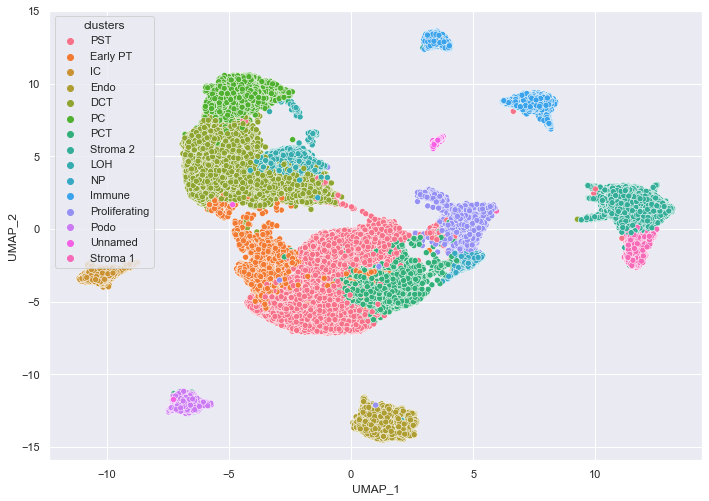

In [149]:
rna_meta = pd.concat([rna_anno.set_index('barcodes'), rna_umap], axis=1)
fig, ax = plt.subplots()
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='clusters', ax=ax, data=rna_meta)

<AxesSubplot:xlabel='umap-1', ylabel='umap-2'>

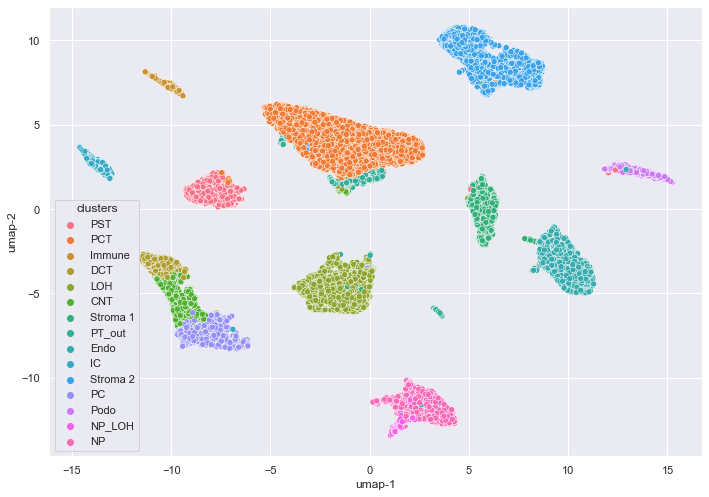

In [150]:
atac_meta = pd.concat([atac_anno, atac_umap], axis=1)
fig, ax = plt.subplots()
sns.scatterplot(x='umap-1', y='umap-2', hue='clusters', ax=ax, data=atac_meta)

In [16]:
# Delete cell types in ATAC
atac_anno = atac_anno[~atac_anno['annotation'].isin(['NP_LOH', 'PT_out'])]
# Delete cell types in RNA
rna_anno = rna_anno[~rna_anno['annotation'].isin(['Unnamed'])]

In [19]:
atac_anno.annotation.value_counts()

PCT         7412
LOH         3628
Stroma 2    3539
Endo        2368
NP          2232
PST         1943
Stroma 1    1479
PC          1325
DCT          950
Podo         912
CNT          879
IC           599
Immune       386
Name: annotation, dtype: int64

In [20]:
rna_anno.annotation.value_counts()

PST              9563
DCT              9075
Stroma 2         4492
PCT              3687
PC               3248
Endo             2395
Proliferating    2177
Immune           1867
Early PT         1816
LOH              1748
Podo              982
IC                953
Stroma 1          774
NP                633
Name: annotation, dtype: int64

In [104]:
atac_anno['annotation'].value_counts().index.difference(rna_anno['annotation'].value_counts().index)

Index(['CNT'], dtype='object')

In [105]:
rna_anno['annotation'].value_counts().index.difference(atac_anno['annotation'].value_counts().index)

Index(['Early PT', 'Proliferating'], dtype='object')

In [106]:
rna_anno['annotation'].value_counts().index.intersection(atac_anno['annotation'].value_counts().index)

Index(['PST', 'DCT', 'Stroma 2', 'PCT', 'PC', 'Endo', 'Immune', 'LOH', 'Podo',
       'IC', 'Stroma 1', 'NP'],
      dtype='object')

In [107]:
rna_anno

barcodes       clusters     annotation
1            Ksp_AAACCTGAGAAGGGTA            PST            PST
2            Ksp_AAACCTGAGACTGGGT       Early PT       Early PT
3            Ksp_AAACCTGAGAGTCGGT             IC             IC
4            Ksp_AAACCTGAGATAGCAT           Endo           Endo
5            Ksp_AAACCTGAGCCAGGAT            PST            PST
...                           ...            ...            ...
43632  P0_batch2_TTTGTTGTCAGGACGA  Proliferating  Proliferating
43633  P0_batch2_TTTGTTGTCATGCATG           Endo           Endo
43634  P0_batch2_TTTGTTGTCCAAATGC           Endo           Endo
43635  P0_batch2_TTTGTTGTCCTCTCGA          Macro         Immune
43636  P0_batch2_TTTGTTGTCCTTCTAA            PST            PST

[43410 rows x 3 columns]

In [108]:
atac_anno

barcodes     samples clusters annotation
1      AAACGAAAGATGTTGA-1  P56_batch2      PT2        PST
2      AAACGAAAGGCTAAAT-1  P56_batch2      PT2        PST
3      AAACGAAAGGGTCCCT-1  P56_batch2       PT        PCT
4      AAACGAAAGTCGAGCA-1  P56_batch2      PT2        PST
5      AAACGAAAGTGTCACT-1  P56_batch2   immune     Immune
...                   ...         ...      ...        ...
28312  TTTGTGTGTGAGGTCA-1  P56_batch1       PT        PCT
28313  TTTGTGTGTGCGCATC-1  P56_batch1      LOH        LOH
28314  TTTGTGTTCGATGAAA-1  P56_batch1       PT        PCT
28315  TTTGTGTTCTGATCTT-1  P56_batch1       PC         PC
28316  TTTGTGTTCTTCGTTA-1  P56_batch1      LOH        LOH

[27652 rows x 4 columns]

In [109]:
# Save
rna_anno.to_csv('%s/RNA/GSE157079_P0_adult_clusters_filtered.csv' % folder)
atac_anno.to_csv('%s/ATAC/GSE157079_snATAC_metadata_filtered.csv' % folder)